In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import tensorflow_datasets as tfds
# Deep Learning Libraries
from tensorflow.python import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,ZeroPadding2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.utils import plot_model
from IPython.display import SVG

Using TensorFlow backend.


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('testX.csv')
#train_df.shape
Y = train_df['Label']
train_x = train_df.drop('Id',axis=1)
X = train_x.drop('Label',axis=1)

test_x = test_df.drop('Id',axis=1)
print(X.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Splitting Data into Train and Validation Set
seed = 42
np.random.seed(seed)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=seed)
print(x_train.shape)
print(x_val.shape)

(54000, 784)
(6000, 784)


In [ ]:
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_val = x_val.values.reshape((-1, 28, 28, 1))
test_x = test_x.values.reshape((-1, 28, 28, 1))

x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255
test_x = test_x.astype("float32")/255


In [ ]:
print("Fashion MNIST train -  rows:",x_train.shape[0]," columns:", x_train.shape[1:4])
print("Fashion MNIST valid -  rows:",x_val.shape[0]," columns:", x_val.shape[1:4])
print("Fashion MNIST test -  rows:",test_x.shape[0]," columns:", test_x.shape[1:4])

Fashion MNIST train -  rows: 54000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 6000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [ ]:
y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
print(y_train.shape)
print(y_val.shape)

(54000, 5)
(6000, 5)


In [ ]:
model = Sequential()

dim = 28
nclasses = 5

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))

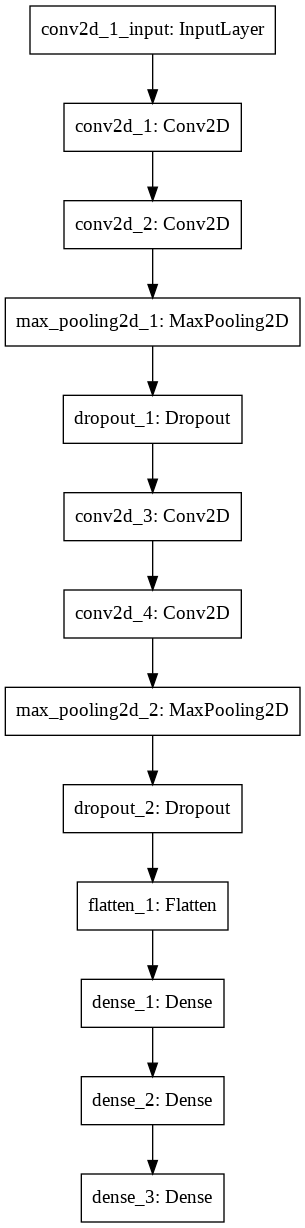

In [ ]:
plot_model(model, to_file='model.png')


In [ ]:
optimizer = Adam(lr=0.001)

In [ ]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 50 # for better result increase the epochs
batch_size = 128

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
history1=model.fit(x_train, y_train,
     batch_size=batch_size,
     epochs=epochs,
     validation_data=(x_val, y_val),
     shuffle=True
     )

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 12s 224us/step - loss: 0.6253 - accuracy: 0.7359 - val_loss: 0.3985 - val_accuracy: 0.8368
Epoch 2/50
54000/54000 [==============================] - 5s 101us/step - loss: 0.4151 - accuracy: 0.8301 - val_loss: 0.3969 - val_accuracy: 0.8300
Epoch 3/50
54000/54000 [==============================] - 5s 101us/step - loss: 0.3605 - accuracy: 0.8527 - val_loss: 0.3154 - val_accuracy: 0.8748
Epoch 4/50
54000/54000 [==============================] - 5s 101us/step - loss: 0.3240 - accuracy: 0.8683 - val_loss: 0.3164 - val_accuracy: 0.8685
Epoch 5/50
54000/54000 [==============================] - 5s 100us/step - loss: 0.3069 - accuracy: 0.8751 - val_loss: 0.3067 - val_accuracy: 0.8743
Epoch 6/50
54000/54000 [==============================] - 5s 101us/step - loss: 0.2943 - accuracy: 0.8790 - val_loss: 0.2846 - val_accuracy: 0.8795
Epoch 7/50
54000/54000 [==============================] - 5s 1

In [ ]:
score = model.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

6000/6000 [==============================] - 1s 106us/step
Loss: 0.3941
Accuracy: 0.8963


In [ ]:
preds = model.predict_classes(test_x)
print(preds)
output=pd.DataFrame({'Id':test_df['Id'],'Label':preds})
print(test_df['Id'])
output.to_csv('output.csv',index=False)

[4 4 0 ... 4 2 2]
0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Id, Length: 10000, dtype: int64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


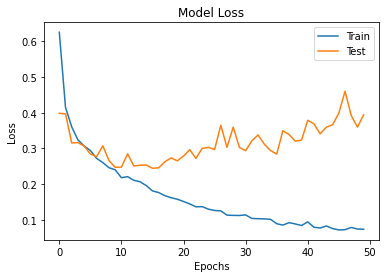

In [ ]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

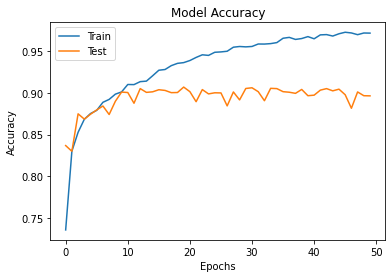

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()